In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(style="white",color_codes=True)


In [2]:
car=pd.read_csv("/kaggle/input/car-price-predictionused-cars/car data.csv")

In [3]:
len(car)

301

In [4]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
print(car["Fuel_Type"].unique())
print(car["Transmission"].unique())
print(car["Selling_type"].unique())
print(car["Owner"].unique())

['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
['Dealer' 'Individual']
[0 1 3]


In [6]:
print(car.Fuel_Type.value_counts())
print(car.Transmission.value_counts())
print(car.Selling_type.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64


In [7]:
car.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
car.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':
2}},inplace=True)
car.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
car.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
    

In [10]:
car.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
5,vitara brezza,2018,9.25,9.83,2071,1,0,0,0
6,ciaz,2015,6.75,8.12,18796,0,0,0,0
7,s cross,2015,6.50,8.61,33429,1,0,0,0
8,ciaz,2016,8.75,8.89,20273,1,0,0,0
9,ciaz,2015,7.45,8.92,42367,1,0,0,0


In [11]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Selling_type   301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


In [12]:
x=car.drop(['Car_Name','Selling_Price'],axis=1)
y=car['Selling_Price']

In [13]:
print('x=',x)

x=      Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             0   
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  
0        0  
1        0  
2        

In [14]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [16]:
print("x_train:",x_train)
print("x_test:",x_test)
print("y_test:",y_test)
print("y_train:",y_train)

x_train:      Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
204  2015          4.430       28282          0             0             0   
249  2016          7.600       17000          0             0             0   
277  2015         13.600       21780          0             0             0   
194  2008          0.787       50000          0             1             0   
244  2013          9.400       49000          1             0             0   
..    ...            ...         ...        ...           ...           ...   
75   2015          6.800       36000          0             0             0   
22   2011          8.010       50000          0             0             1   
72   2013         18.610       56001          0             0             0   
15   2016         10.790       43000          1             0             0   
168  2013          0.730       12000          0             1             0   

     Owner  
204      0  
249      0  
277

In [17]:
model=LinearRegression()

In [18]:
model.fit(x_train,y_train)

LinearRegression()

In [19]:
prediction=model.predict(x_train)


In [20]:
error=metrics.r2_score(y_train,prediction)
print("erroe:",error)

erroe: 0.8796483009370215


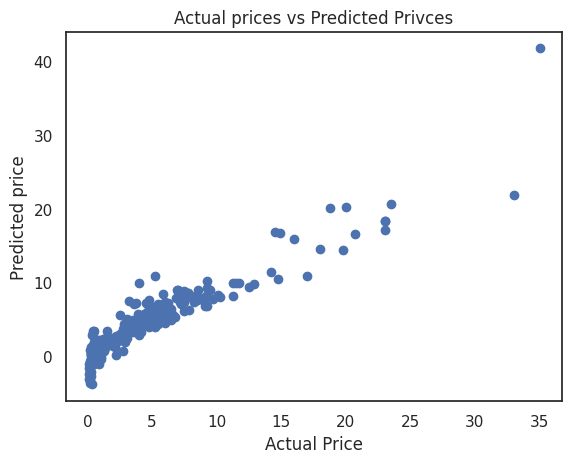

In [21]:
plt.scatter(y_train,prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual prices vs Predicted Privces")
plt.show()

In [22]:
prediction=model.predict(x_test)

In [23]:
error=metrics.r2_score(y_test,prediction)
print("error:",error)

error: 0.8365861023210703


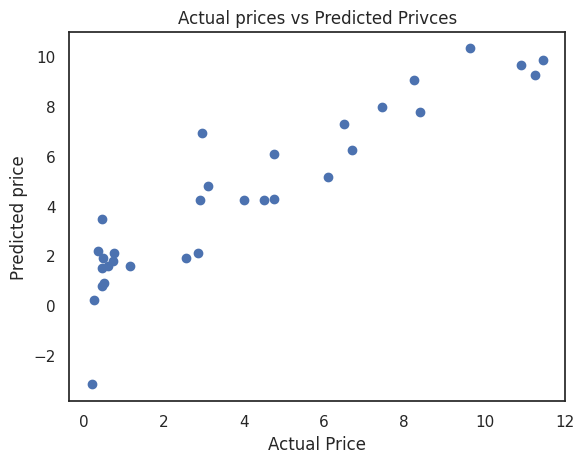

In [24]:
plt.scatter(y_test,prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual prices vs Predicted Privces")
plt.show()

In [25]:
lasso_reg_model=Lasso()

In [26]:
lasso_reg_model.fit(x_train,y_train)

Lasso()

In [27]:
lasso_prediction=lasso_reg_model.predict(x_train)

In [28]:
error1=metrics.r2_score(y_train,lasso_prediction)
print("error:",error1)

error: 0.8424480718240743


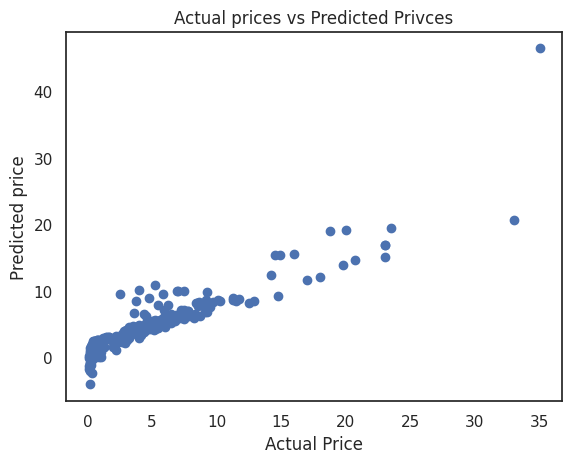

In [29]:
plt.scatter(y_train,lasso_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual prices vs Predicted Privces")
plt.show()

error: 0.8709763132343395


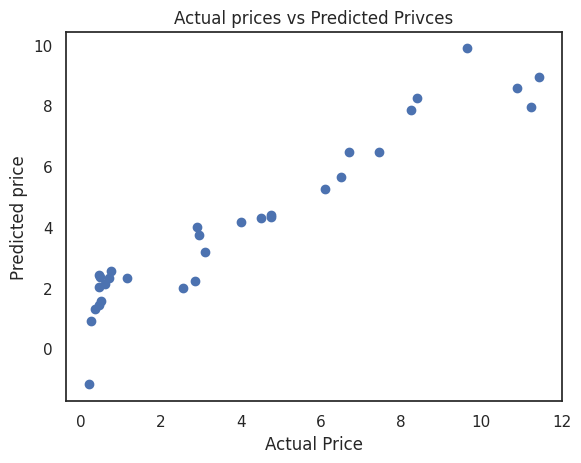

In [30]:
lasso_prediction=lasso_reg_model.predict(x_test)
error1=metrics.r2_score(y_test,lasso_prediction)
print("error:",error1)
plt.scatter(y_test,lasso_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual prices vs Predicted Privces")
plt.show()